In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
from scipy import stats

In [2]:
df_all = pd.read_csv(r"top1_freq.csv")
df_all = df_all.sort_values("pop").reset_index()[["ID", "pop", "freq"]]

In [3]:
def run_once():
    temp = np.empty(shape=16, dtype=np.int16)
    current_all = df_all.copy()
    current_total_pop = current_all["freq"].sum()
    count = 0

    for i in range(16):
        rand_num = random.random()
        cumulative_prob = 0
        for index in current_all.index:
            current_prob = cumulative_prob + current_all.loc[index, "freq"] / current_total_pop
            if cumulative_prob <= rand_num < current_prob:
                temp[count] = index
                count += 1
                current_total_pop -= current_all.loc[index, "freq"]
                current_all = current_all.drop(index)
                break
            cumulative_prob = current_prob

    return temp

In [4]:
def simulation(repeat):
    temp = np.zeros(shape=167, dtype=np.float64)
    for i in range(repeat):
        result = run_once()
        for j in result:
            temp[j] += 1.0
    return temp / repeat

In [5]:
def repeat_simulation(repeat, simulation_repeat):
    result = np.empty(shape=(167, repeat), dtype=np.float64)
    for i in range(repeat):
        # print(i)
        temp = simulation(simulation_repeat)
        for index, val in enumerate(temp):
            result[index][i] = val
    return result

In [6]:
result = repeat_simulation(50,5000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [7]:
# low = []
# high = []
mean_val = [i.mean() for i in result]

# we can calculate the confidence interval based on all the number of simulation
# for i in range(167):
#     mean, sigma = np.mean(result[i]), np.std(result[i])
#     intv = stats.norm.interval(0.95, loc=mean, scale=sigma)
#     low.append(intv[0])
#     high.append(intv[1])

# final_result = pd.DataFrame({"mean": mean_val, "high": high, "low": low})
final_result = pd.DataFrame({"mean": mean_val, "ID": df_all["ID"], "pop": df_all["pop"]})
# final_result["ID"] = df_all["ID"]
# final_result["pop"] = df_all["pop"]
final_result.set_index("ID", inplace=True)
final_result.to_csv("empirical_distribution1.csv")

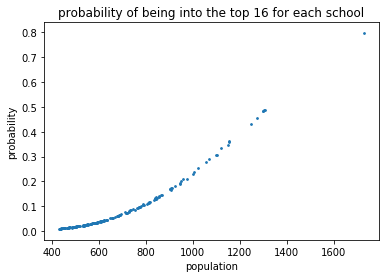

In [3]:
plt.scatter(pd.read_csv("empirical_distribution1.csv")["pop"], pd.read_csv("empirical_distribution1.csv")["mean"], label="mean", s=3)
plt.xlabel("population")
plt.ylabel("probability")
plt.title("probability of being into the top 16 for each school")
# plt.savefig('prob_vs_pop2', transparent=True)
plt.show()